# Kriptovaliutos ir rinkos
> Kriptovaliutų koreliacija su rinkomis.

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#hide
df_all = read_api()

/Users/Dom/Documents/Bachelor/corr-app/_notebooks/scripts/read_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['currency'] = df_final.apply(lambda row: fsym, axis=1)


In [3]:
#hide
from IPython.display import HTML

## Koreliacijų koeficientai

In [4]:
#hide_input
sum_corr = df_all.corr().sum().sort_values(ascending=True).index.values
df_all[sum_corr].corr()

currency,XAU,BTC,LSK,EOS,ETH
currency,,,,,
XAU,1.000000,0.112660,0.016142,0.054734,0.058412
BTC,0.112660,1.000000,0.505359,0.680431,0.747524
LSK,0.016142,0.505359,1.000000,0.698489,0.895730
EOS,0.054734,0.680431,0.698489,1.000000,0.823223
ETH,0.058412,0.747524,0.895730,0.823223,1.000000


## Koreliacijų matrica

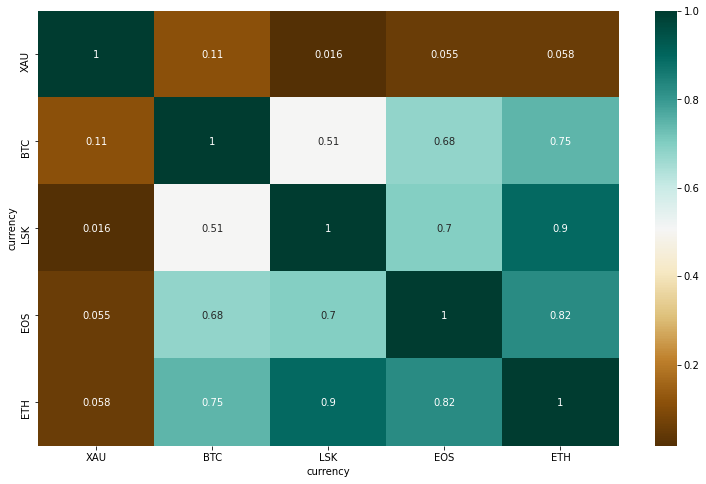

In [5]:
#hide_input
plt.figure(figsize=(13, 8))
sns.heatmap(df_all[sum_corr].corr(), annot=True, cmap="BrBG");
